In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats as st
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
import seaborn as sns
from statsmodels.graphics.regressionplots import *
import copy
import math
import time
%matplotlib inline

C:\Users\chads\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
sns.set_context("poster")
sns.set_style("whitegrid")

Load eXtreme Gradient Boosting Classifier

In [3]:
mingw_path = 'C:\Program Files\mingw-w64\x86_64-7.2.0-posix-seh-rt_v5-rev1\mingw64\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [4]:
from xgboost import XGBClassifier

In [5]:
# Downloaded combine csv to my desktop, therefore change directory to my pc desktop
os.chdir('C:\Users\chads\Desktop')

Below, is just a reminder of what our dataset looked like prior to dropping undrafted players. In the picktotal column you will notice some null's and those are players that weren't drafted and we'll be doing some data preprocessing later, so our algorithms run.

In [6]:
# Import and preview the raw combine data
newdf2 = pd.read_csv("newdf2.csv")
newdf2.head(10)

,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0
1,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0
2,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0
3,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0
4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0
5,RB,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,125.0
6,S,72.0,218,4.56,4.03,7.09,35.5,122.0,NaN,142.0
7,WR,73.0,187,NaN,NaN,NaN,NaN,NaN,13.0,NaN
8,DE,78.0,294,5.03,4.19,7.20,30.0,111.0,NaN,93.0
9,TE,77.0,244,NaN,NaN,NaN,NaN,NaN,NaN,254.0


We now have more players

In [7]:
newdf2.shape

(4822, 10)

# Data Preprocessing
Turn our categorical variable, position, into dummy variables

In [8]:
# Create dummy variables
newdf_dummy = pd.get_dummies(newdf2)
newdf_dummy.head()

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,position_C,...,position_DT,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0,0,...,0,0,0,0,0,0,1,0,0,0
1,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0,0,...,0,0,0,0,0,0,1,0,0,0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0,0,...,0,0,0,0,0,0,0,0,0,1


Algorithms won't run with null values, therefore will fill those in with zeros. If you notice in the picktotal column, players that were not drafted are now labeled zero

In [9]:
# Change values in picktotal column to objects in order to create dummy variables
newdf_dummy = newdf_dummy.fillna(0)
newdf_dummy.head(8)

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,position_C,...,position_DT,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0,0,...,0,0,0,0,0,0,1,0,0,0
1,72.0,198,4.42,0.00,0.00,0.0,0.0,12.0,20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0,0,...,0,0,0,0,0,0,1,0,0,0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0,0,...,0,0,0,0,0,0,0,0,0,1
5,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,125.0,0,...,0,0,0,0,0,0,1,0,0,0
6,72.0,218,4.56,4.03,7.09,35.5,122.0,0.0,142.0,0,...,0,0,0,0,0,0,0,1,0,0
7,73.0,187,0.00,0.00,0.00,0.0,0.0,13.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


Since this is a classification problem, we need to change our players that WERE drafted to 1. Now in column picktotal we only have two values which are 0 (undrafted players) and 1 (drafted players).

In [10]:
newdf_dummy.picktotal = [1 if x!= 0 else x for x in newdf_dummy.picktotal]

# Count how many players were drafted and not drafted
class_counts = newdf_dummy.groupby('picktotal').size()
newdf_dummy.head(10)

,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal,position_C,...,position_DT,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
1,72.0,198,4.42,0.00,0.00,0.0,0.0,12.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,1.0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
5,72.0,221,4.53,4.28,6.96,35.5,121.0,11.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
6,72.0,218,4.56,4.03,7.09,35.5,122.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
7,73.0,187,0.00,0.00,0.00,0.0,0.0,13.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
8,78.0,294,5.03,4.19,7.20,30.0,111.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
9,77.0,244,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0


Just to make my life easier, I'm moving the picktotal column to the end of our table.

In [11]:
# get a list of columns
cols = list(newdf_dummy)
# move the column to head of list using index, pop and insert
cols.insert(21, cols.pop(cols.index('picktotal')))
cols

['height',
 'weight',
 'fortyyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'position_C',
 'position_CB',
 'position_DE',
 'position_DT',
 'position_ILB',
 'position_OG',
 'position_OLB',
 'position_OT',
 'position_QB',
 'position_RB',
 'position_S',
 'position_TE',
 'position_WR',
 'picktotal']

In [12]:
# use ix to reorder
df = newdf_dummy.ix[:, cols]
df.head()

C:\Users\chads\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,position_C,position_CB,...,position_ILB,position_OG,position_OLB,position_OT,position_QB,position_RB,position_S,position_TE,position_WR,picktotal
0,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1,72.0,198,4.42,0.00,0.00,0.0,0.0,12.0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
2,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
3,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
4,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,0,0,...,0,0,0,0,0,0,0,0,1,1.0


In [13]:
# Rescale attributes
array = df.values
# separate array into input and output components
x = array[:,0:21].astype(float)
y = array[:,21]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.235  0.216  0.76   0.71   0.817  0.924  0.884  0.471  0.     0.     0.
   0.     0.     0.     0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.412  0.186  0.731  0.     0.     0.     0.     0.235  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]
 [ 0.412  0.286  0.755  0.737  0.854  0.848  0.823  0.373  0.     0.     0.
   0.     0.     0.     0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.471  0.312  0.752  0.755  0.859  0.783  0.823  0.471  0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.176  0.108  0.732  0.732  0.799  0.739  0.823  0.255  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]]


One issue is that ~65% of players in our dataset were drafted and 35% weren't drafted, creating an uneven distribution

In [14]:
print 'Original dataset shape {}'.format(Counter(y))

Original dataset shape Counter({1.0: 3133, 0.0: 1689})


Will use over-sampling to get an even amount of drafted and undrafted players

In [15]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_sample(rescaledX, y)
print 'Resampled dataset shape {}'.format(Counter(Y))

Resampled dataset shape Counter({0.0: 3133, 1.0: 3133})


In [16]:
# Split-out rescaled validation dataset
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.33, random_state=seed)

# Evaluate Standardized Algorithms
Standardization is a useful technique to transform attributes that are not normally distributed, with differing means and standard deviations, to a standard normal distribution with a mean of 0 and a standard deviation of 1.

Will check from 6 algorithms, which one has the highest accuracy. CART wins.

ScaledLR: 0.578850 (0.008967)
ScaledLDA: 0.577897 (0.009586)


C:\Users\chads\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ScaledKNN: 0.620533 (0.006636)
ScaledCART: 0.632445 (0.015760)
ScaledNB: 0.552647 (0.011154)
ScaledSVM: 0.621728 (0.011285)


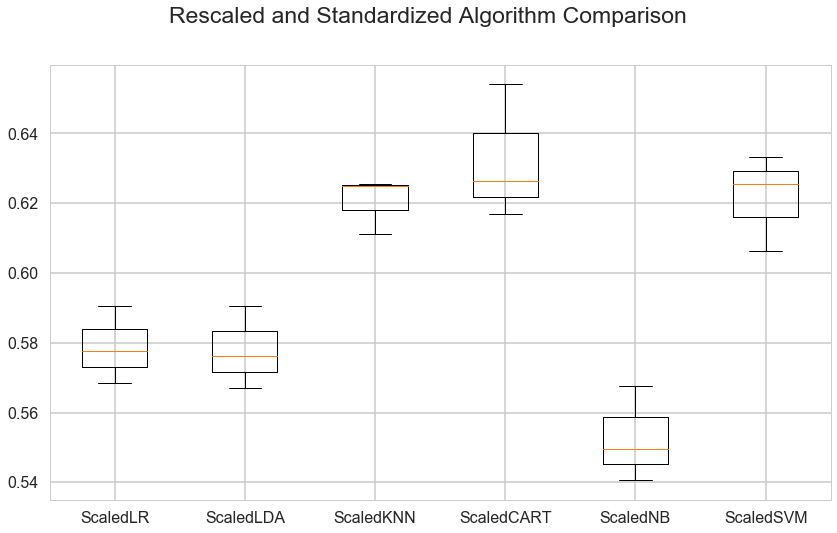

In [17]:
# Test options and evaluation metric
num_folds = 3
seed = 7
scoring = 'accuracy'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Rescaled and Standardized Algorithm Comparison')
_=ax = fig.add_subplot(111)
plt.boxplot(results)
_=ax.set_xticklabels(names)

# Ensemble Methods
Gradient boosting classifier is the winner between the 6 algorithms and 5 ensembles with an accuracy of 69.44%. 2 out 4 ensembles beat out the best classification algorithm, SVM, as well.

AB: 0.663651 (0.008925)
GBM: 0.694382 (0.013932)
XGB: 0.692950 (0.008399)
RF: 0.686278 (0.004147)
ET: 0.685091 (0.008179)


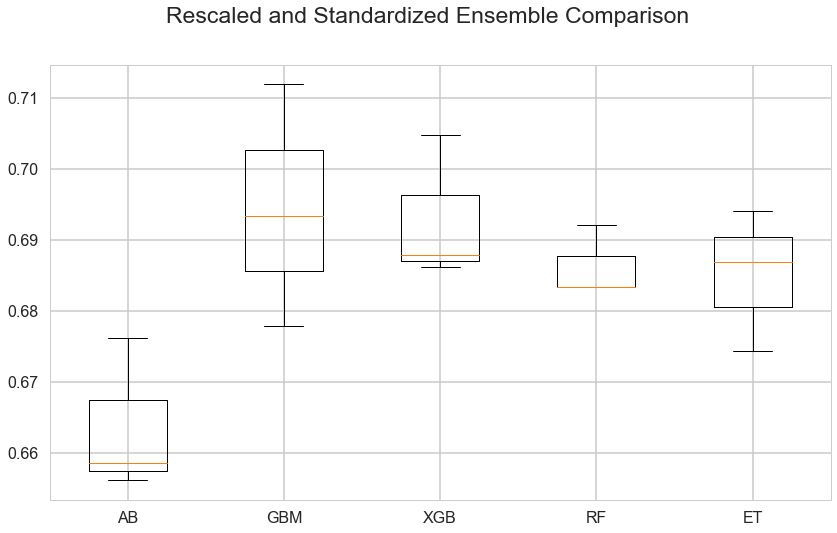

In [18]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('XGB', XGBClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Rescaled and Standardized Ensemble Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
_=ax.set_xticklabels(names)

# Test the model

Since XGB classifier has been shown to win a lot of Kaggle competitions and is much faster than Sci-kit learns gradient booster, I will continue with the XGB classifier. 

The model is 68.42% accurate to classify if a player will or will not be drafted. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The model has an overall precision of 68%

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. Overall at 68%

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 (precision recall) / (precision + recall). Overall at 69% is ok.

The support is the number of occurrences of each class in Y_validation.

Luckily our confusion matrix mainly consisted of true negatives (712) and true positives (703) with false positives (340) third and lastly false negatives (313).

0.684235976789
[[712 340]
 [313 703]]
             precision    recall  f1-score   support

        0.0       0.69      0.68      0.69      1052
        1.0       0.67      0.69      0.68      1016

avg / total       0.68      0.68      0.68      2068



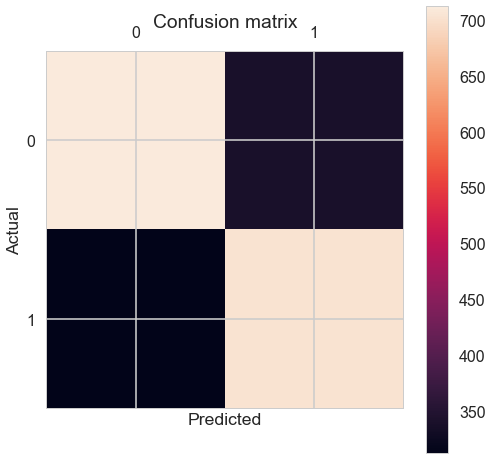

In [19]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = XGBClassifier()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
matrix = confusion_matrix(Y_validation, predictions)
print(accuracy_score(Y_validation, predictions))
print(matrix)
plt.matshow(matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(classification_report(Y_validation, predictions))

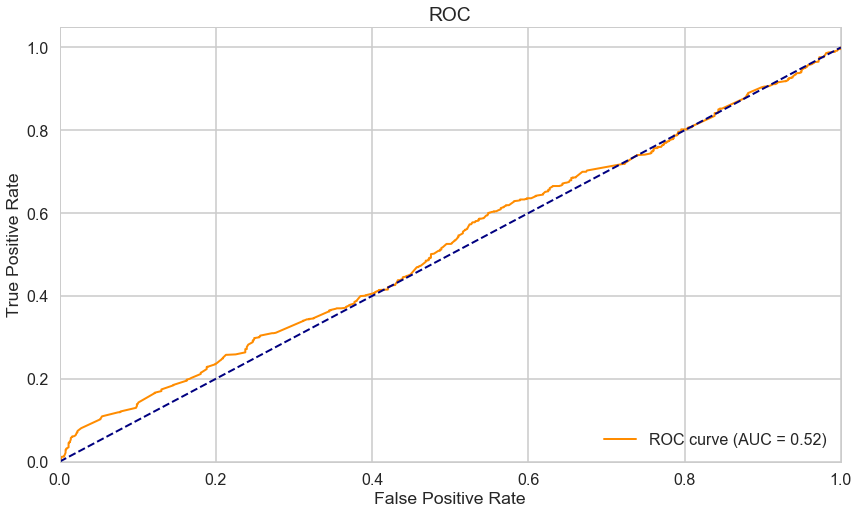

In [20]:
# Import necessary modules
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_proba = model.predict_proba(X_validation)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_validation, y_pred_proba)

roc_auc = auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
_=plt.legend(loc="lower right")

### Tune the Number and Size of Decision Trees

[1, 3, 5, 7, 9]
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  4.4min finished


Best: -0.503956 using {'n_estimators': 250, 'max_depth': 7}
-0.652586 (0.008175) with: {'n_estimators': 50, 'max_depth': 1}
-0.640646 (0.010480) with: {'n_estimators': 100, 'max_depth': 1}
-0.633793 (0.011280) with: {'n_estimators': 150, 'max_depth': 1}
-0.629357 (0.011997) with: {'n_estimators': 200, 'max_depth': 1}
-0.625745 (0.012530) with: {'n_estimators': 250, 'max_depth': 1}
-0.622964 (0.012958) with: {'n_estimators': 300, 'max_depth': 1}
-0.620574 (0.013394) with: {'n_estimators': 350, 'max_depth': 1}
-0.598478 (0.013838) with: {'n_estimators': 50, 'max_depth': 3}
-0.573614 (0.014779) with: {'n_estimators': 100, 'max_depth': 3}
-0.559414 (0.015515) with: {'n_estimators': 150, 'max_depth': 3}
-0.547813 (0.016696) with: {'n_estimators': 200, 'max_depth': 3}
-0.539286 (0.015883) with: {'n_estimators': 250, 'max_depth': 3}
-0.531993 (0.016317) with: {'n_estimators': 300, 'max_depth': 3}
-0.526584 (0.016493) with: {'n_estimators': 350, 'max_depth': 3}
-0.565437 (0.016898) with: {'n_e

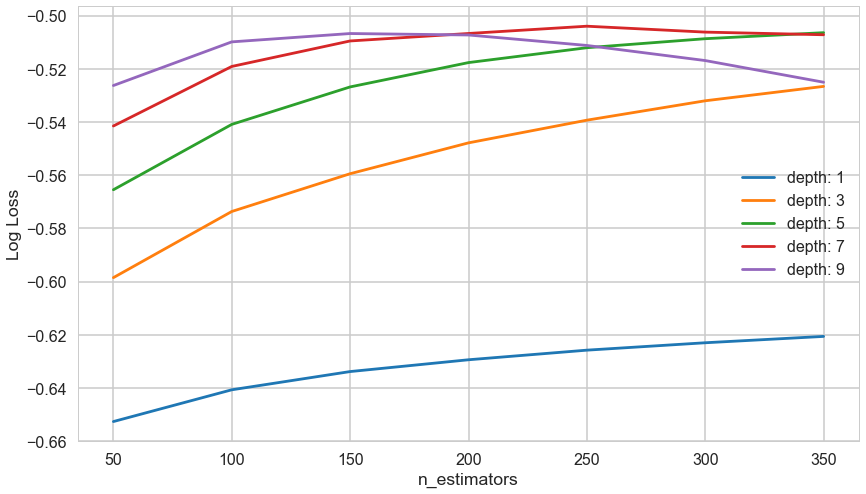

In [21]:
from sklearn.model_selection import StratifiedKFold
# grid search
model = XGBClassifier()
n_estimators = range(50, 400, 50)
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
    plt.legend()
    plt.xlabel('n_estimators')
    plt.ylabel('Log Loss')
    plt.savefig('n_estimators_vs_max_depth.png')

In order to avoid overfitting with XGBoost, early stopping will be implemented. First plot training and test sets to get an idea when error and logloss are at it's lowest before it starts to climb (overfit).

Accuracy: 73.45%


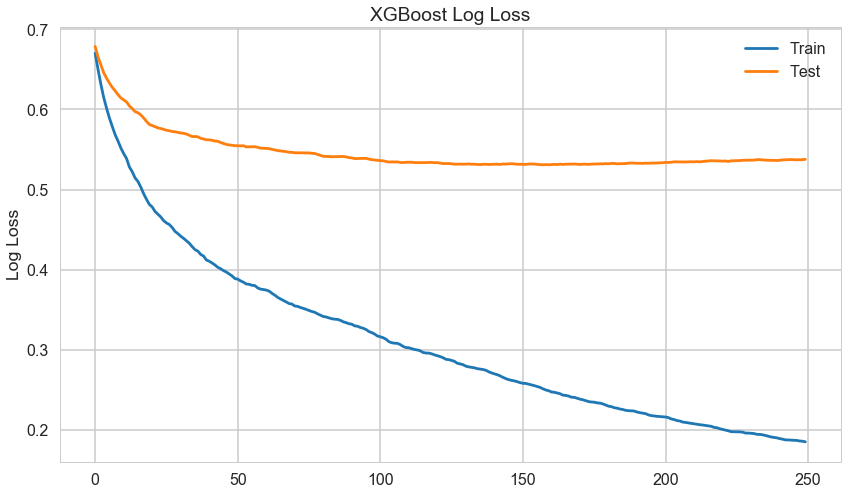

Text(0.5,1,u'XGBoost Classification Error')

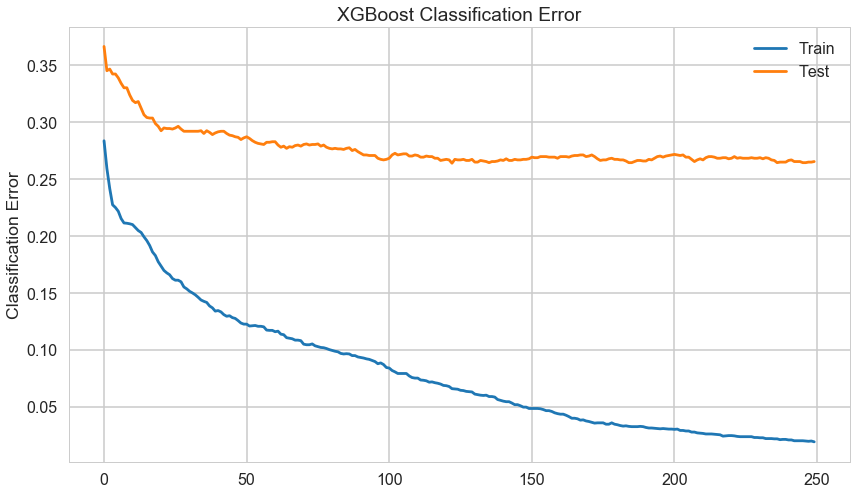

In [22]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# fit model on training data
model = XGBClassifier( n_estimators=250, max_depth=7)
eval_set = [(X_train, Y_train), (X_validation, Y_validation)]
model.fit(X_train, Y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_validation)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')

135 early stopping point goes along with our charts and will use this for the remainder of the project to avoid overfitting.

In [23]:
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss",
eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_validation)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.670172	validation_1-logloss:0.678611
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.650103	validation_1-logloss:0.665598
[2]	validation_0-logloss:0.631468	validation_1-logloss:0.655622
[3]	validation_0-logloss:0.614882	validation_1-logloss:0.645815
[4]	validation_0-logloss:0.601592	validation_1-logloss:0.638956
[5]	validation_0-logloss:0.589279	validation_1-logloss:0.632996
[6]	validation_0-logloss:0.578729	validation_1-logloss:0.627591
[7]	validation_0-logloss:0.568626	validation_1-logloss:0.623373
[8]	validation_0-logloss:0.560651	validation_1-logloss:0.618578
[9]	validation_0-logloss:0.552046	validation_1-logloss:0.614465
[10]	validation_0-logloss:0.544942	validation_1-logloss:0.61199
[11]	validation_0-logloss:0.538785	validation_1-logloss:0.609458
[12]	validation_0-logloss:0.528265	validation_1-logloss:0.604537
[

[124]	validation_0-logloss:0.287739	validation_1-logloss:0.532595
[125]	validation_0-logloss:0.286763	validation_1-logloss:0.532157
[126]	validation_0-logloss:0.285588	validation_1-logloss:0.531721
[127]	validation_0-logloss:0.283182	validation_1-logloss:0.531766
[128]	validation_0-logloss:0.28243	validation_1-logloss:0.531811
[129]	validation_0-logloss:0.281451	validation_1-logloss:0.531703
[130]	validation_0-logloss:0.279573	validation_1-logloss:0.53177
[131]	validation_0-logloss:0.278717	validation_1-logloss:0.532011
[132]	validation_0-logloss:0.278107	validation_1-logloss:0.531687
[133]	validation_0-logloss:0.277545	validation_1-logloss:0.531701
[134]	validation_0-logloss:0.276496	validation_1-logloss:0.531334
[135]	validation_0-logloss:0.275927	validation_1-logloss:0.531225
[136]	validation_0-logloss:0.275426	validation_1-logloss:0.531547
[137]	validation_0-logloss:0.274494	validation_1-logloss:0.531639
[138]	validation_0-logloss:0.272583	validation_1-logloss:0.531294
[139]	valida

Check to see which learning rate provides the least amount of log loss. 0.1 it is..

Best: -0.503956 using {'learning_rate': 0.1}
-0.689264 (0.000208) with: {'learning_rate': 0.0001}
-0.661181 (0.002648) with: {'learning_rate': 0.001}
-0.567835 (0.013420) with: {'learning_rate': 0.01}
-0.503956 (0.022653) with: {'learning_rate': 0.1}
-0.529808 (0.027165) with: {'learning_rate': 0.2}
-0.579096 (0.034830) with: {'learning_rate': 0.3}


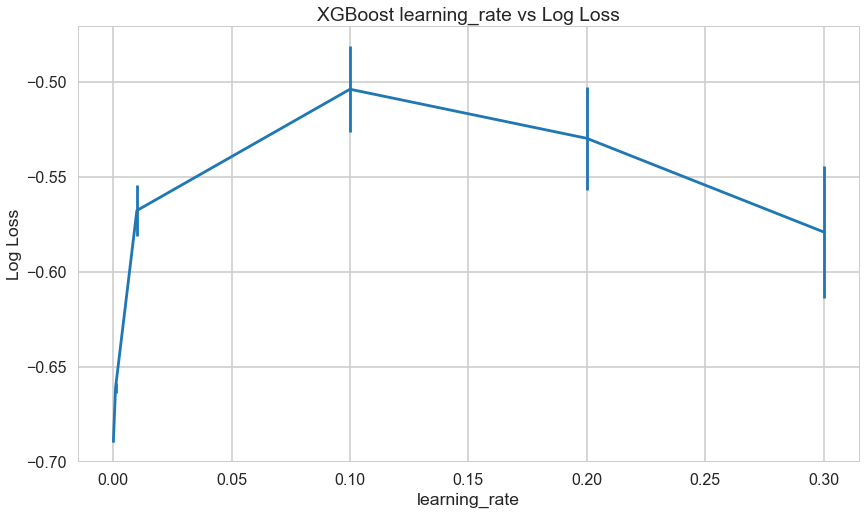

In [24]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.savefig('learning_rate.png')

0.8 subsample gives the lowest log loss.

Best: -0.502235 using {'subsample': 0.8}
-0.564632 (0.024240) with: {'subsample': 0.1}
-0.548010 (0.021111) with: {'subsample': 0.2}
-0.528748 (0.029275) with: {'subsample': 0.3}
-0.520385 (0.018531) with: {'subsample': 0.4}
-0.515466 (0.021469) with: {'subsample': 0.5}
-0.508585 (0.024752) with: {'subsample': 0.6}
-0.503183 (0.022757) with: {'subsample': 0.7}
-0.502235 (0.021733) with: {'subsample': 0.8}
-0.503956 (0.022653) with: {'subsample': 1.0}


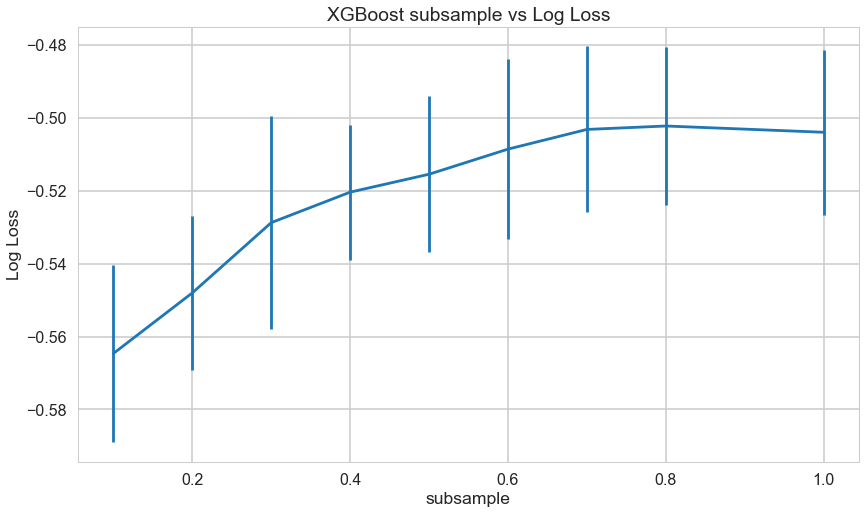

In [25]:
# grid search
model = XGBClassifier( n_estimators=250, max_depth=7, learning_rate=0.1)
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(subsample, means, yerr=stds)
plt.title("XGBoost subsample vs Log Loss")
plt.xlabel('subsample')
plt.ylabel('Log Loss')
plt.savefig('subsample.png')

Will check to see which parameter from colsample_bytree or colsample_bylevel give the lowest log loss.

Best: -0.485943 using {'colsample_bytree': 0.3}
-0.495363 (0.008799) with: {'colsample_bytree': 0.1}
-0.487549 (0.014009) with: {'colsample_bytree': 0.2}
-0.485943 (0.013970) with: {'colsample_bytree': 0.3}
-0.490807 (0.015909) with: {'colsample_bytree': 0.4}
-0.492354 (0.019926) with: {'colsample_bytree': 0.5}
-0.494625 (0.021480) with: {'colsample_bytree': 0.6}
-0.491042 (0.021483) with: {'colsample_bytree': 0.7}
-0.497594 (0.022900) with: {'colsample_bytree': 0.8}
-0.502235 (0.021733) with: {'colsample_bytree': 1.0}


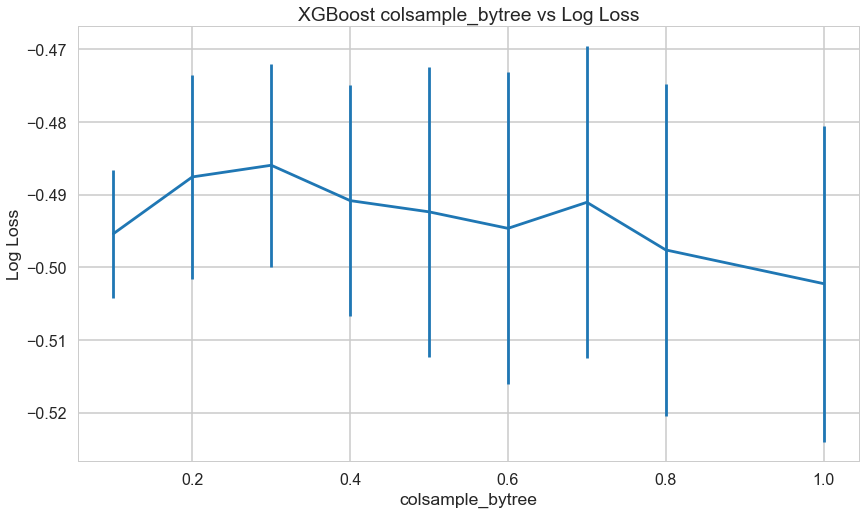

In [26]:
# grid search
model = XGBClassifier( n_estimators=250, max_depth=7, learning_rate=0.1, subsample=0.8)
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(colsample_bytree, means, yerr=stds)
plt.title("XGBoost colsample_bytree vs Log Loss")
plt.xlabel('colsample_bytree')
plt.ylabel('Log Loss')
plt.savefig('colsample_bytree.png')

colsample_bytree at 0.3 with a log loss of -0.485943, narrowly beats colsample_bylevel at 0.6 with a log loss of -0.499528.

Best: -0.499528 using {'colsample_bylevel': 0.6}
-0.526292 (0.018096) with: {'colsample_bylevel': 0.1}
-0.504861 (0.020016) with: {'colsample_bylevel': 0.2}
-0.500454 (0.022702) with: {'colsample_bylevel': 0.3}
-0.503834 (0.019564) with: {'colsample_bylevel': 0.4}
-0.500717 (0.021376) with: {'colsample_bylevel': 0.5}
-0.499528 (0.022703) with: {'colsample_bylevel': 0.6}
-0.502151 (0.024207) with: {'colsample_bylevel': 0.7}
-0.502688 (0.022803) with: {'colsample_bylevel': 0.8}
-0.502235 (0.021733) with: {'colsample_bylevel': 1.0}


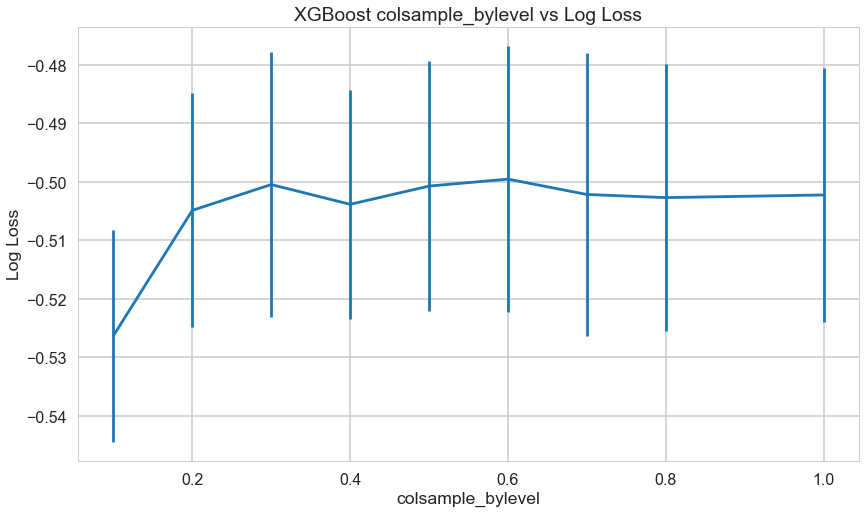

In [27]:
# grid search
model = XGBClassifier( n_estimators=250, max_depth=7, learning_rate=0.1, subsample=0.8)
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bylevel=colsample_bylevel)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(colsample_bylevel, means, yerr=stds)
plt.title("XGBoost colsample_bylevel vs Log Loss")
plt.xlabel('colsample_bylevel')
plt.ylabel('Log Loss')
plt.savefig('colsample_bylevel.png')

# Test the Final Model After Tuning
After determining the best number and depth of tree, learning rate, subsample, colsample_bytree and early stopping to avoid overfitting, we can now check th results against our validation set. Accuracy increases by 5.27%, while total precision, recall, and f1 score all increase by 6%.

Accuracy: 73.69%
[[740 312]
 [232 784]]
             precision    recall  f1-score   support

        0.0       0.76      0.70      0.73      1052
        1.0       0.72      0.77      0.74      1016

avg / total       0.74      0.74      0.74      2068



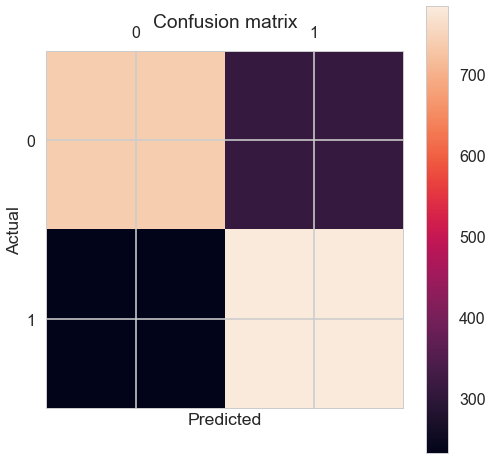

In [28]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# fit model on training data
model = XGBClassifier( n_estimators=250, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=0.3 )
eval_set = [(X_validation, Y_validation)]
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_validation)
predictions = [round(value) for value in y_pred]
# evaluate predictions
matrix = confusion_matrix(Y_validation, predictions)
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(matrix)
plt.matshow(matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(classification_report(Y_validation, predictions))

AUC goes from 0.52 to 0.82!! Our classifier is significantly better post tuning! The model is much better than doing a coin flip! :)

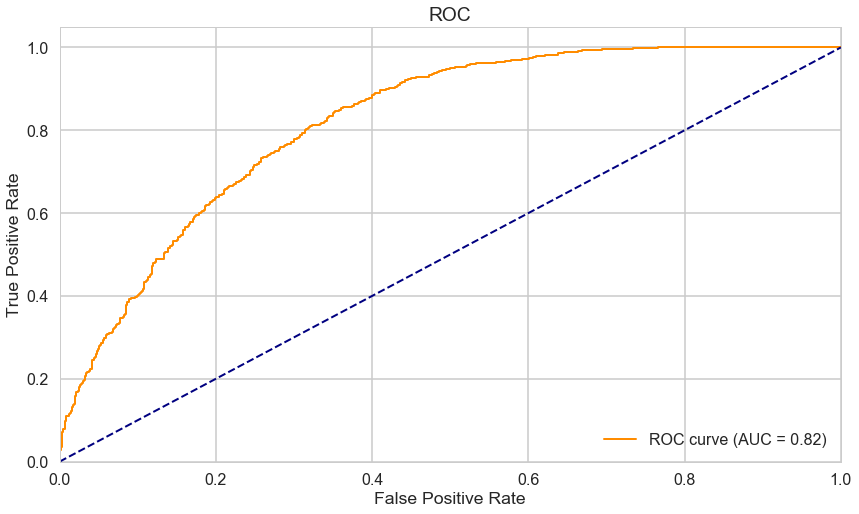

In [29]:
# Compute predicted probabilities: y_pred_prob
y_pred_proba = model.predict_proba(X_validation)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_validation, y_pred_proba)

roc_auc = auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
_=plt.legend(loc="lower right")

Forty yard dash (f2) is by far the most important predictor, with twenty yard short shuttle (f3) second, weight (f1) third and vertical jump (f5) fourth. f8-f20 are the positions and as you can see it really doesn't matter the position one plays to determine if he will be drafted. 

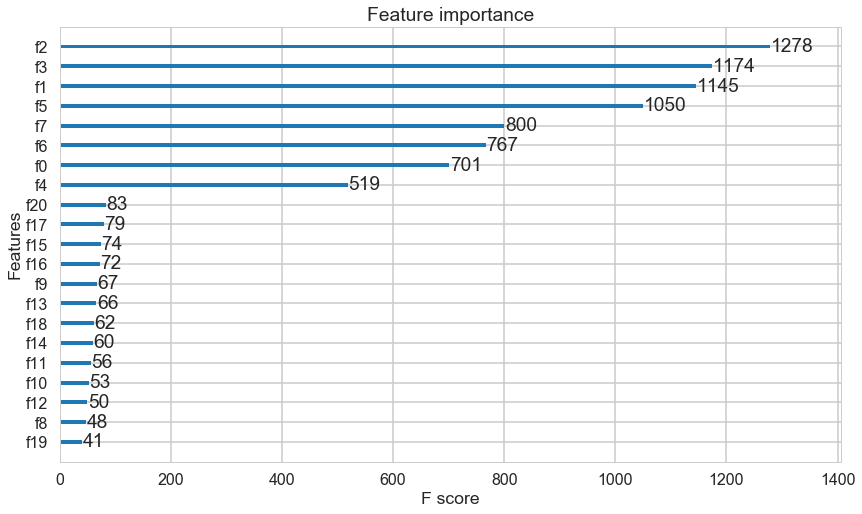

In [30]:
from xgboost import plot_importance
# plot feature importance
_=plot_importance(model)